# DS-SF-36 | Unit Project | 1 | Research Design | Starter Code

In this first unit project, you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: The outcome is a data dictionary, where key is the name of the user and value is a variable that contains a binary variable 0 or 1. 0 indicates the customer will go on to stay a free customer. 1 indicates that the customer will convert into a paying customer.

> ### Question 2.  What are the predictors/covariates?

Answer: The attributes associated with each user. In this case, age, gender, location, profession and customer usage data are all attributes and these can be used as predictors.

> ### Question 3.  What timeframe is this data relevent for?

Answer: January to April 2015

> ### Question 4.  What is the hypothesis?

Answer: The demographics and the Customer Usage data will give us patterns through which we can predict the behavior of the customer (as to whether the customer will turn into a paying customer or not).

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [8]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df
#trying to run this on the system
# the idea is to play with the jupyter notebook
#and save the changes onto the terminal

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [44]:
cols=df.columns


> ### Question 5.  Create a data dictionary.

Variable | Description | Type of Variable
---|---|---
admit | admit = 1 means student has been admitted. admit = 0 meand admission denied | Categorical
gre | Test Score for gradute record examination | Continuous
gpa | Performance score that stands for Grade Point Average | Continuous
prestige | The group in which student belongs. 1 being the best and 4 being the worst | Categorial

In [7]:
#Answer 5 - Creating a data dictionary
#Trial of putting the values in a Key Value pair. 
d={'admit': ["Whether the Student was admitted or not", "Categorical"],'gre': ["Test Score", "Continuous"],'gpa': ["Performance Score", "Continuous"], 'prestige': ["The group in which user belongs", "Categorical"] }
print d



{'admit': ['Whether the Student was admitted or not', 'Categorical'], 'gre': ['Test Score', 'Continuous'], 'gpa': ['Performance Score', 'Continuous'], 'prestige': ['The group in which user belongs', 'Categorical']}


We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

df.corr()


In [41]:
df.corr()
#This answer here tells us that the outcome admit 
#is positively correlated with gre & gpa. 
#The outcome admit is negatively correlated with prestige

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 7.  What are the predictors/covariates?

The predictors are gre, gpa and prestige

> ### Question 8.  What timeframe is this data relevent for?

There is no timeframe for this data set stated. Hence, this question is not applicable to the UCLA dataset.

> ### Question 9.  What is the hypothesis?

Answer: The hypotheses here is that the variables gre, gpa and prestige will help us predict whether a student will get admitted into UCLA or not.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: We have the admit, gre, gpa and prestige data for a set of students. Use this dataset to determine a relationship between admit and gre,gpa and presitge. This relationship can then be applied on a batch of fresh students to assess whether they are likely to get admission or not. The end goal of this exercise is - If we are given a dataset of students containing gre,gpa and prestige, we should be able to predict whether the student will get in or not.

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer: The goal of Exploratory data analysis is to help us gain insight into the dataset. Through EDA we explore the relationship between predicted value and predictors, see if there are any outliers in the data. Get a feel of the data through asessing the size of the dataset, correlation between the predicted variable and the predictors etc.

> ### Question 12.  What are the assumptions of the distribution of data?

The assumption is that data can be represented by a single distribution. Usually, we make the assumption of normal distribution. Normal distribution means that the values are equally distributed around the mean. Other most important types of distribution can be binomial, poisson, uniform, exponential.

> ### Question 13.  How will determine the distribution of your data?

In [ ]:
One the ways to determine the distribution of the data is by looking at 
the histogram for the dataset. Another way to determine the distribution of the data is 
by looking at box plots to see how are the values placed around the mean.

<IPython.core.display.Javascript object>


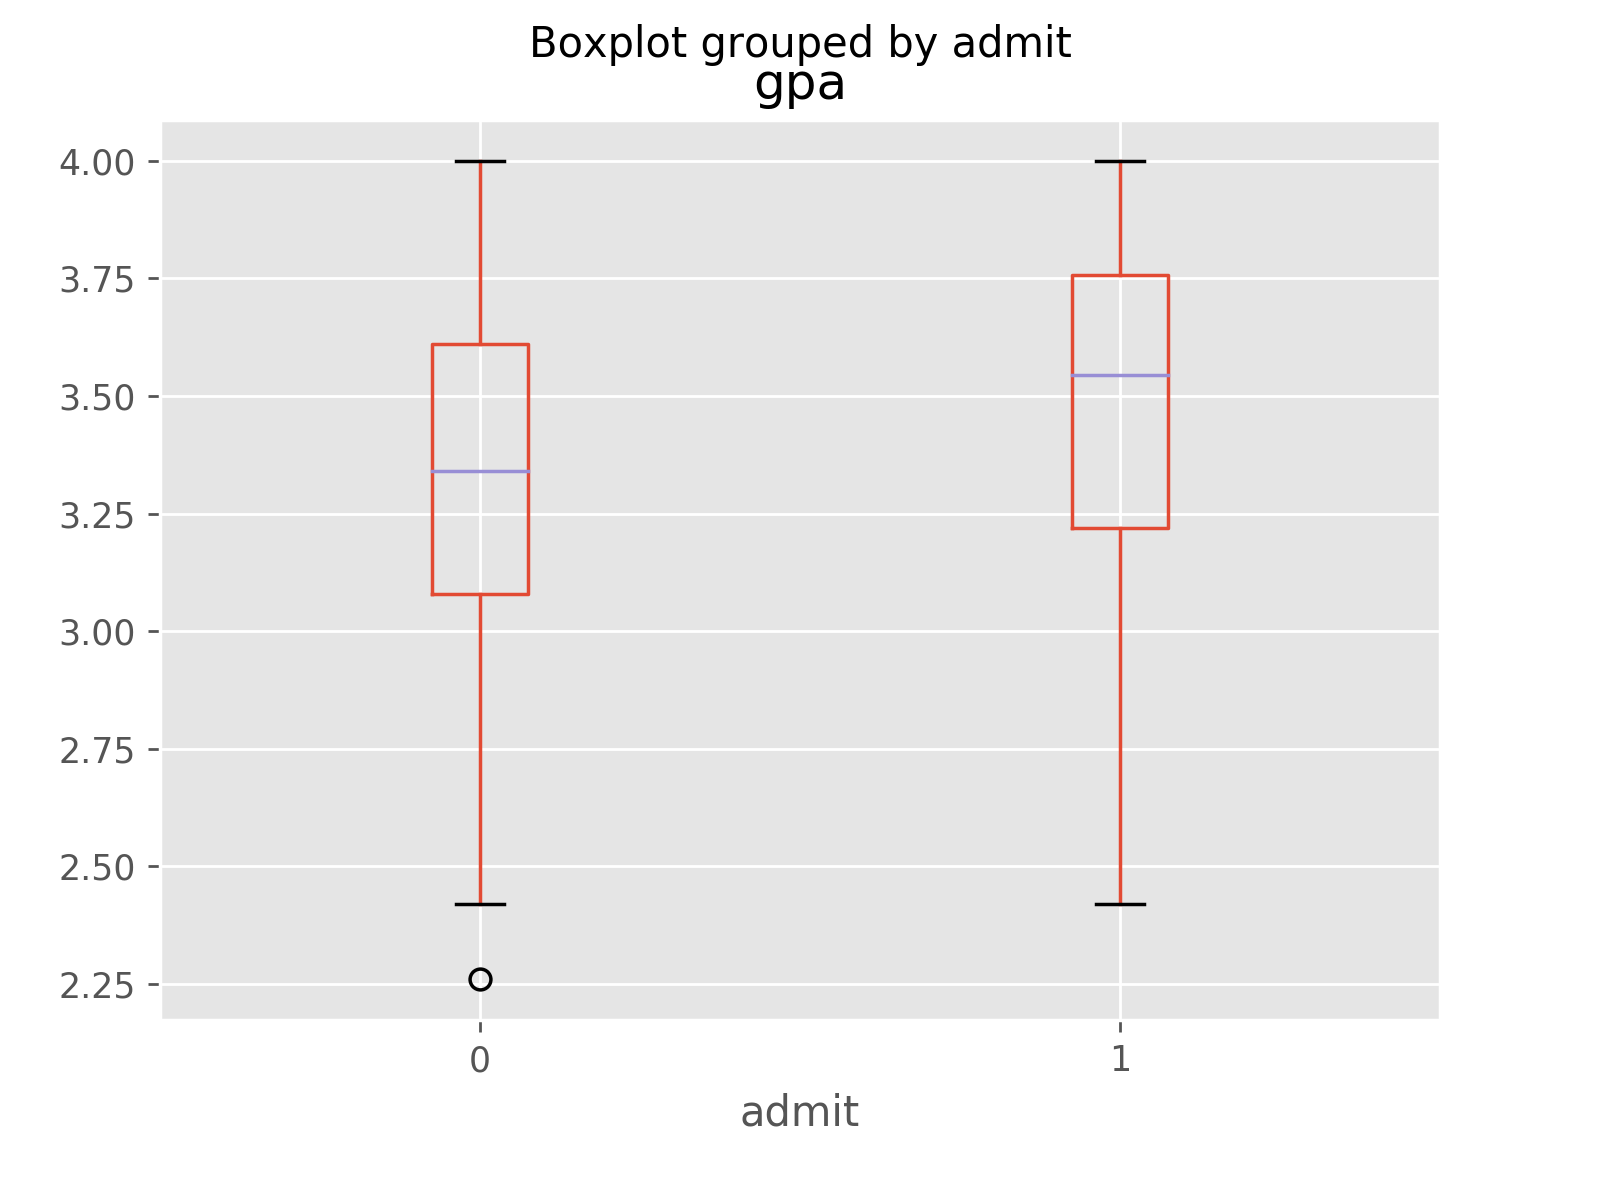

In [29]:
#finding distribution by looking at the box plots
import matplotlib
matplotlib.style.use('ggplot')
df.boxplot(column="gpa",by="admit")

<IPython.core.display.Javascript object>


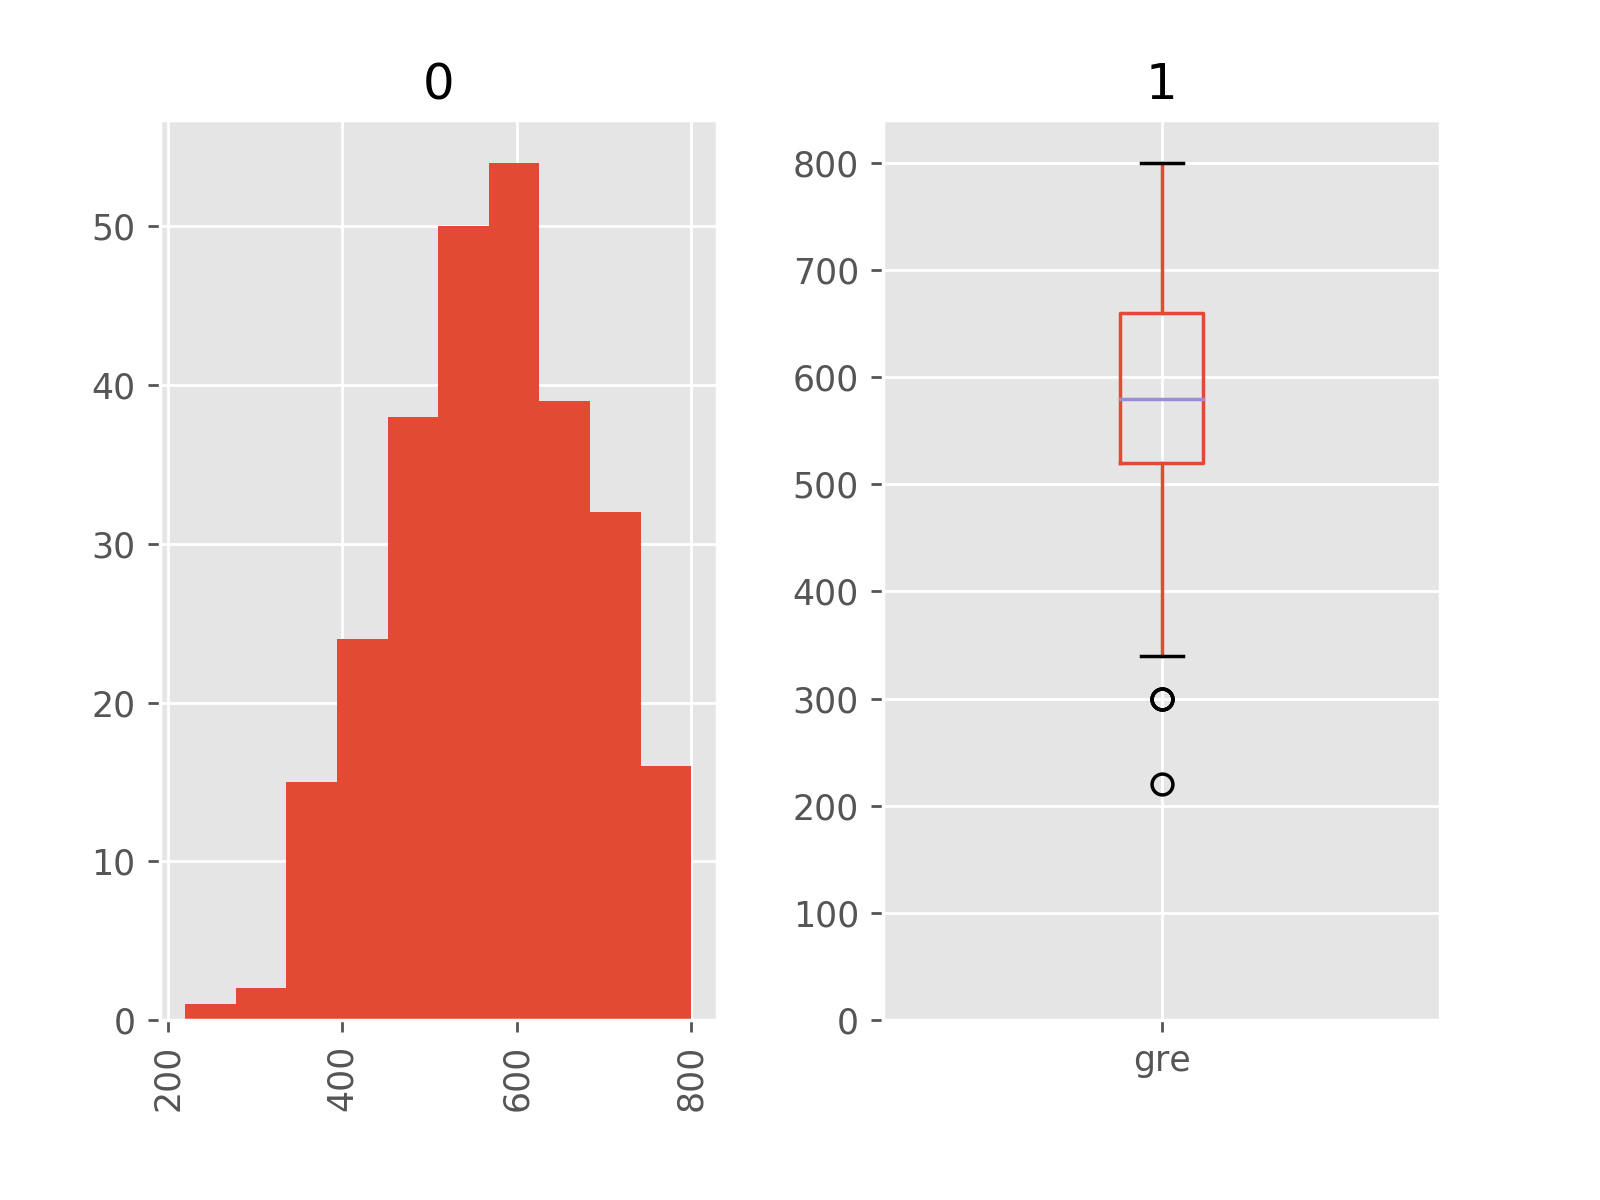

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12db2cb90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12eb10e10>], dtype=object)

In [32]:
#finding distribution by looking at the histogram
df.hist(column="gre",by="admit",bins=10)

<IPython.core.display.Javascript object>


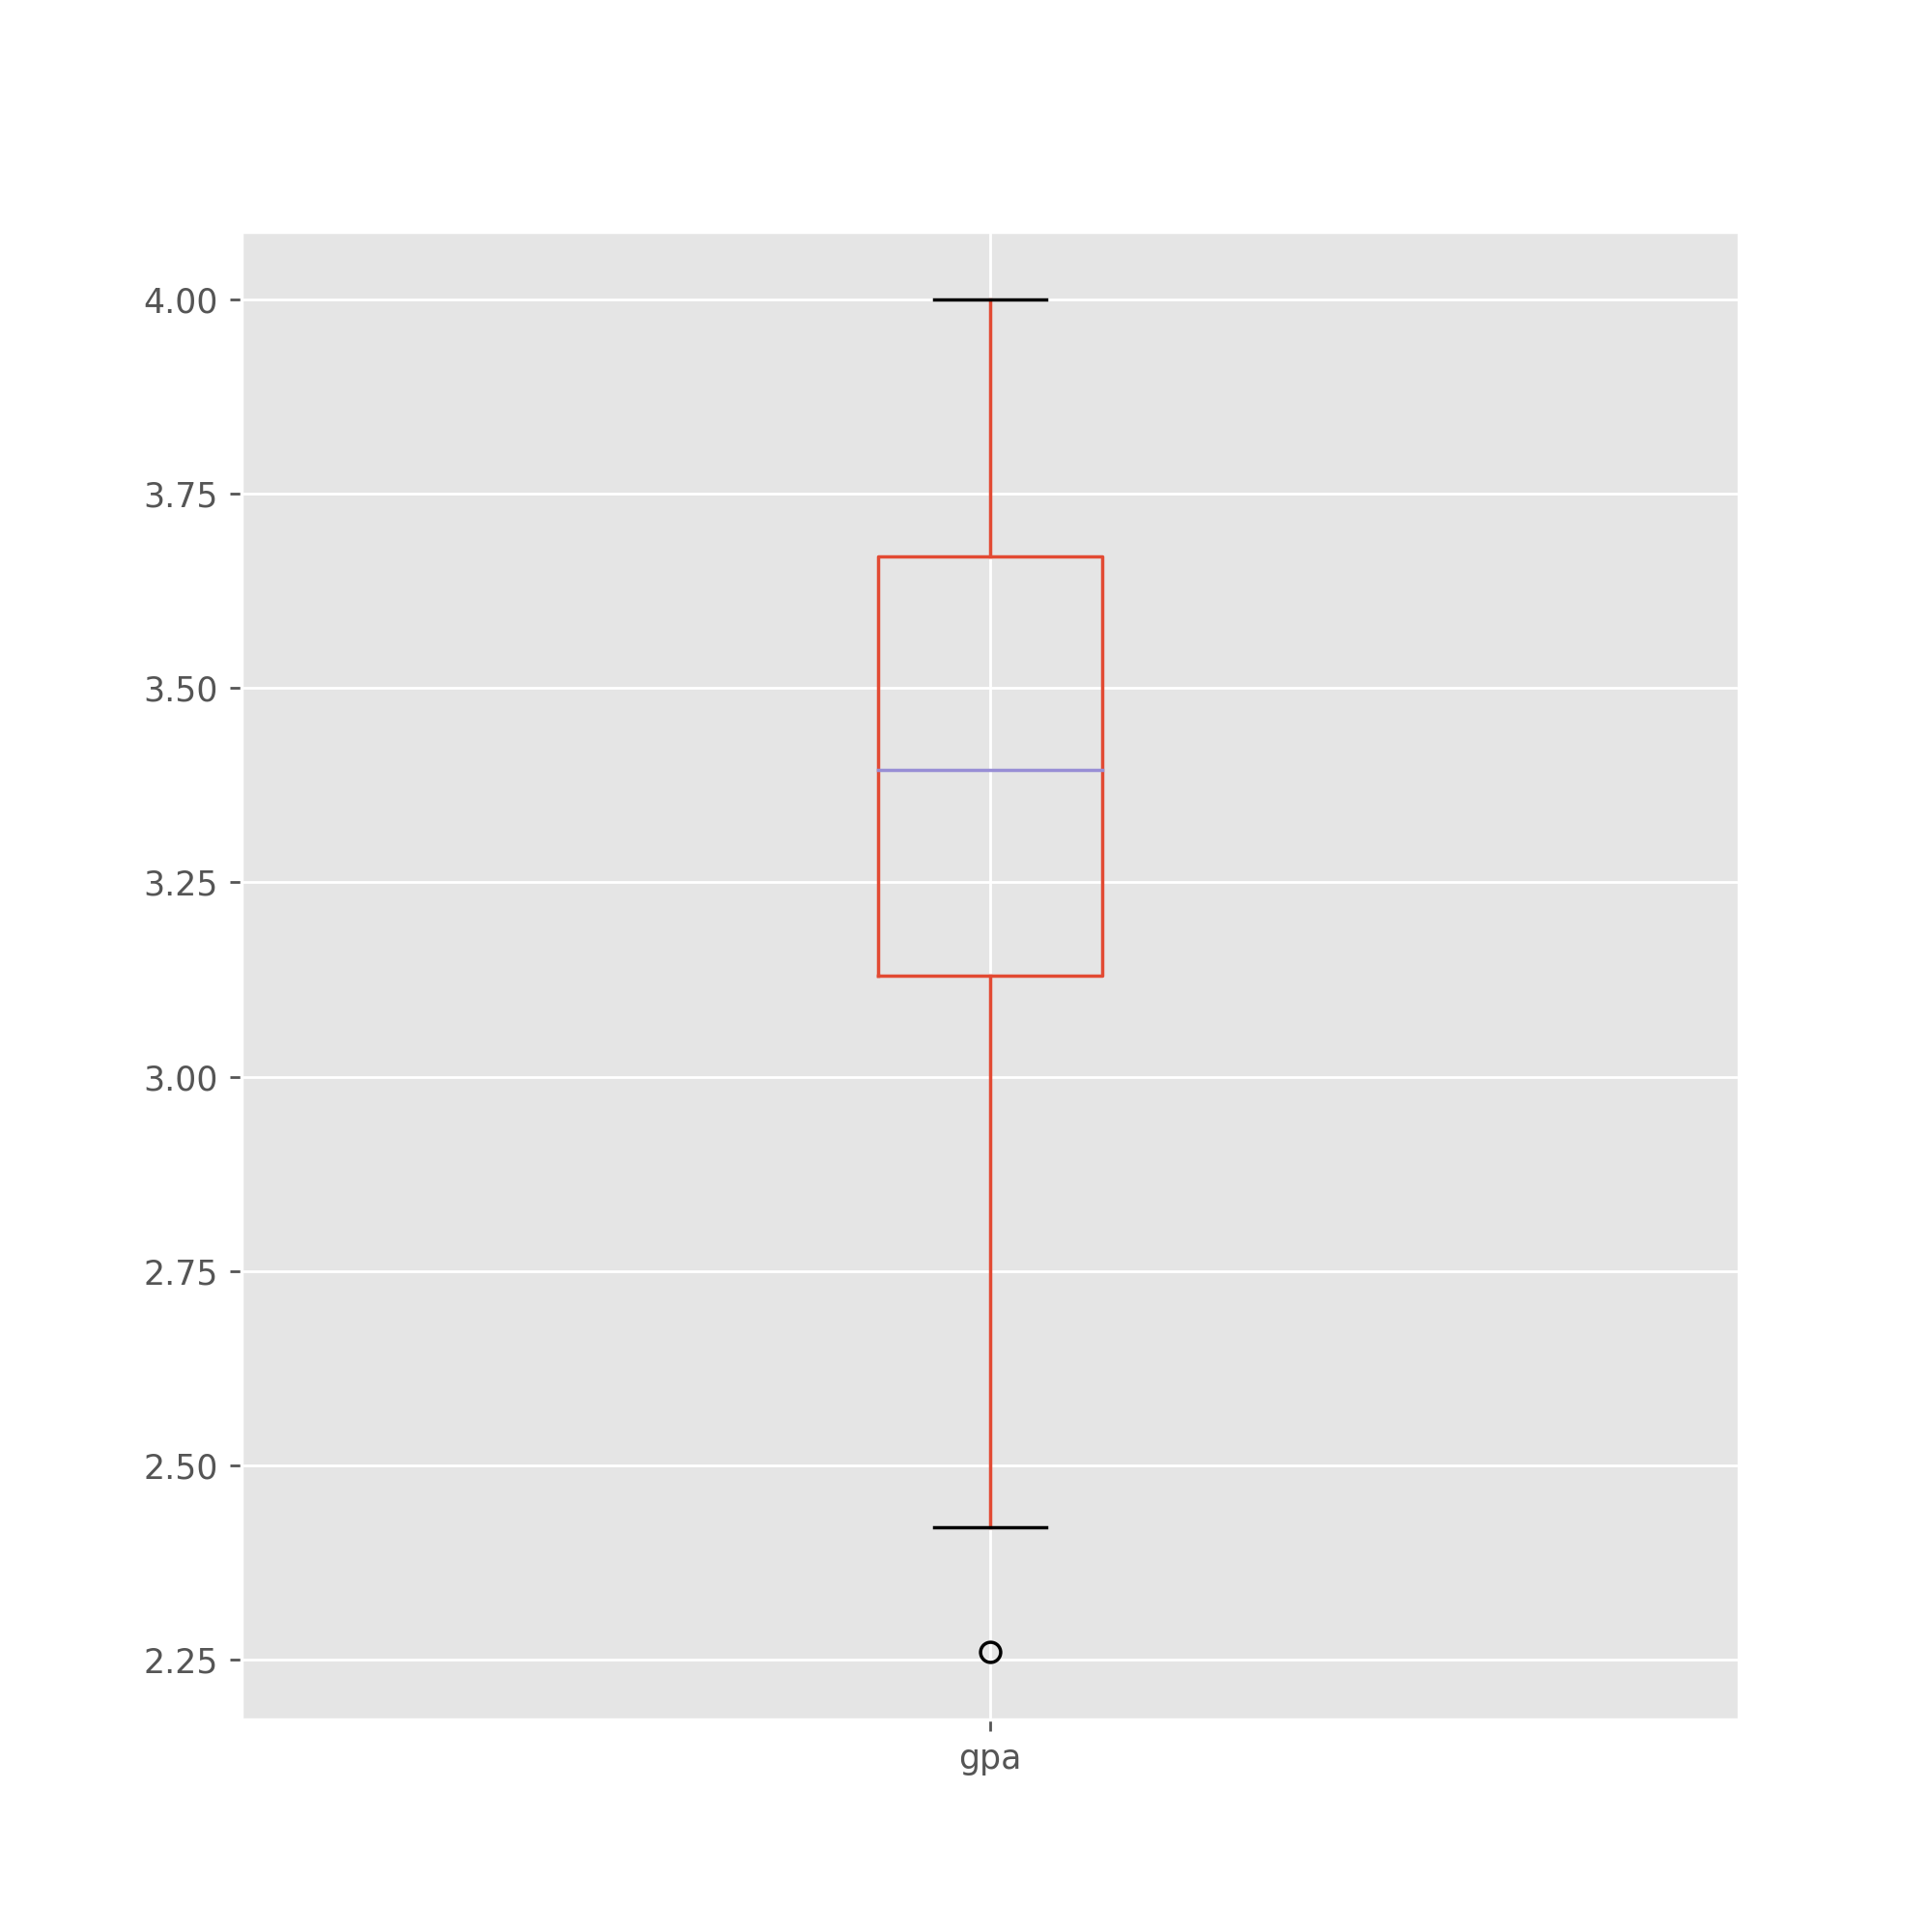

<bound method DataFrame.hist_frame of      admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
..     ...    ...   ...       ...
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0

[400 rows x 4 columns]>

In [25]:
import matplotlib
matplotlib.style.use('ggplot')
df.gpa.plot(kind = 'box', figsize = (8, 8))

<IPython.core.display.Javascript object>


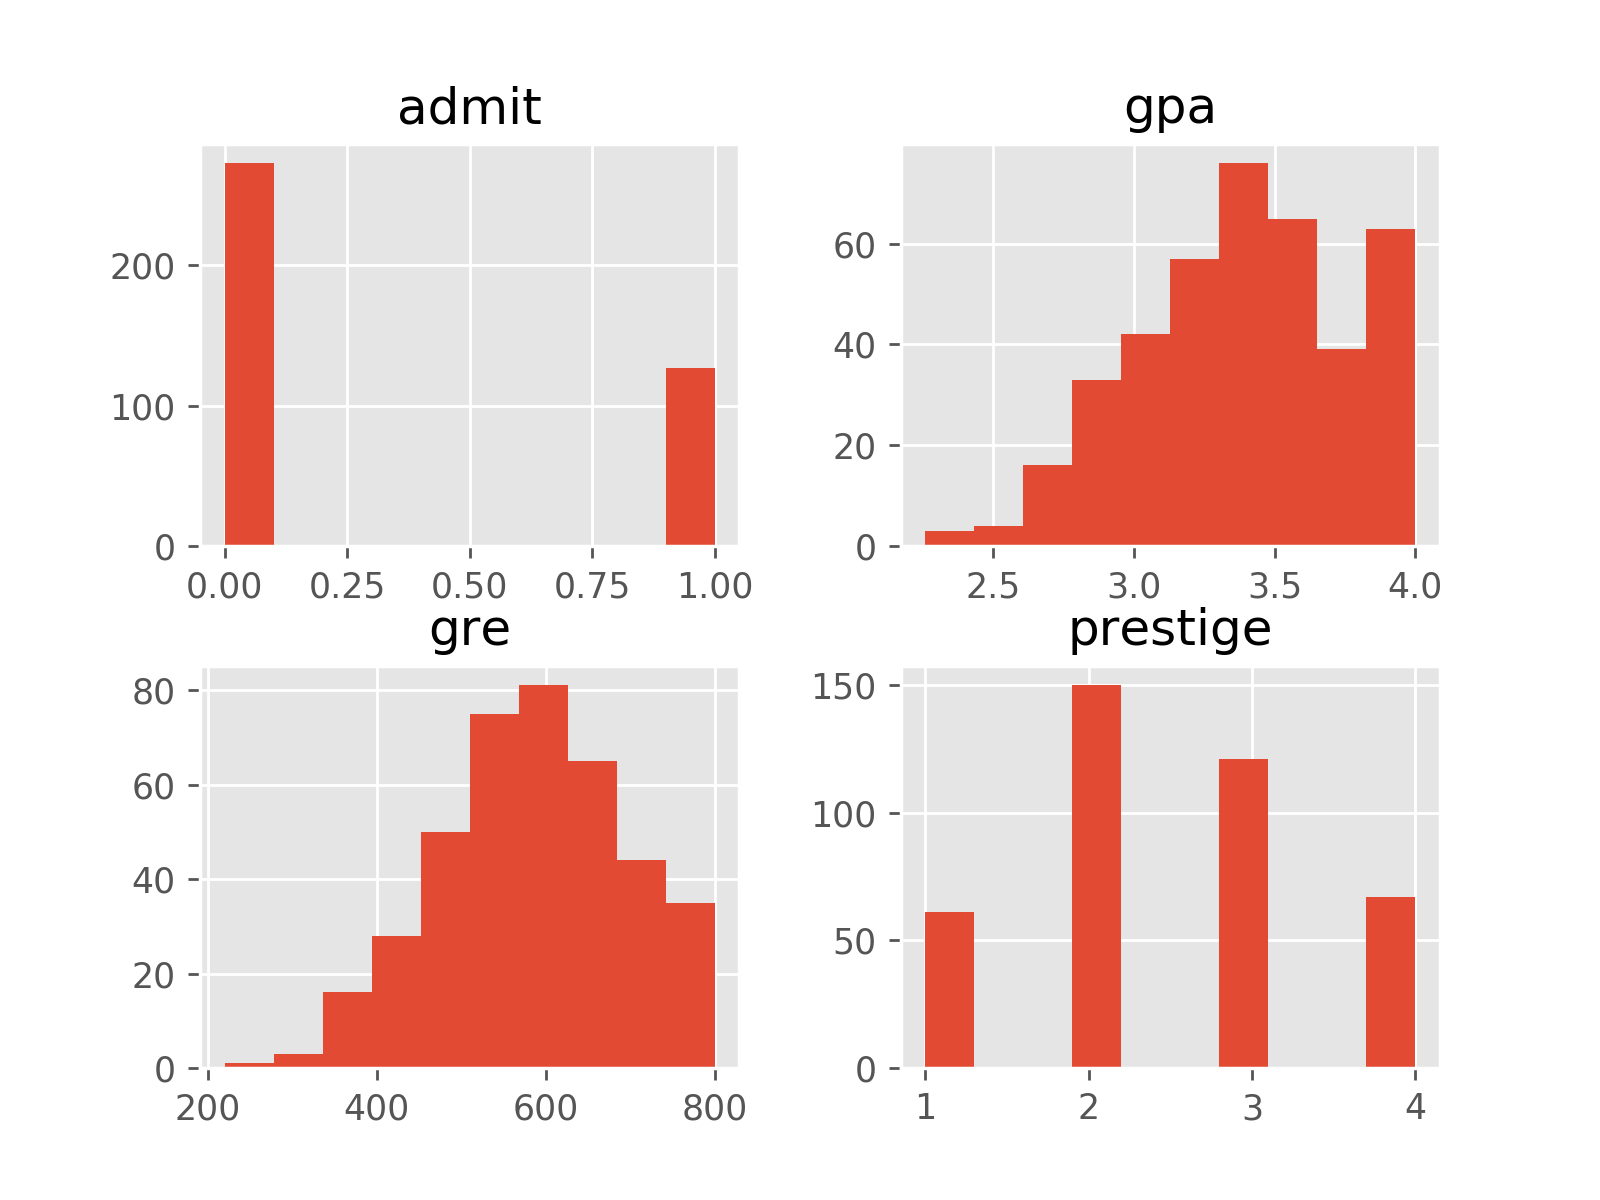

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127b01950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128b98fd0>]], dtype=object)

In [26]:
df.hist()


> ### Question 14.  How might outliers impact your analysis?

Outliers can significantly impact the result of the analysis/model. Let's take an example- Lets assume was have a data set of 400 students with their weight and height. Nearly 399 students have their weights between 70kg to 80kg. One student's weight is around 300kg. In this case, taking the average of all the weights of students can give an inaccurate picture of the weight of students (because of not having treated the one student of weight 300kg as an outlier). Outliers make the model less 'generalizable' and hence less useful.

> ### Question 15.  How will you test for outliers?

Looking at the distribution of data can help detect outliers. Also, looking at the mean and median can also help detect whether there are outliers in the data. If there is a lot of gap between the mean and the median, we can look at the distribution of data to see which  values are leading to the mean getting distorted. Given below is the example. Any value outside the 1.5 (interquartile range) from the 25th percentile and 75th percentile can be treated as an outlier.


588.0 is the mean and 580.0 is the median


<IPython.core.display.Javascript object>


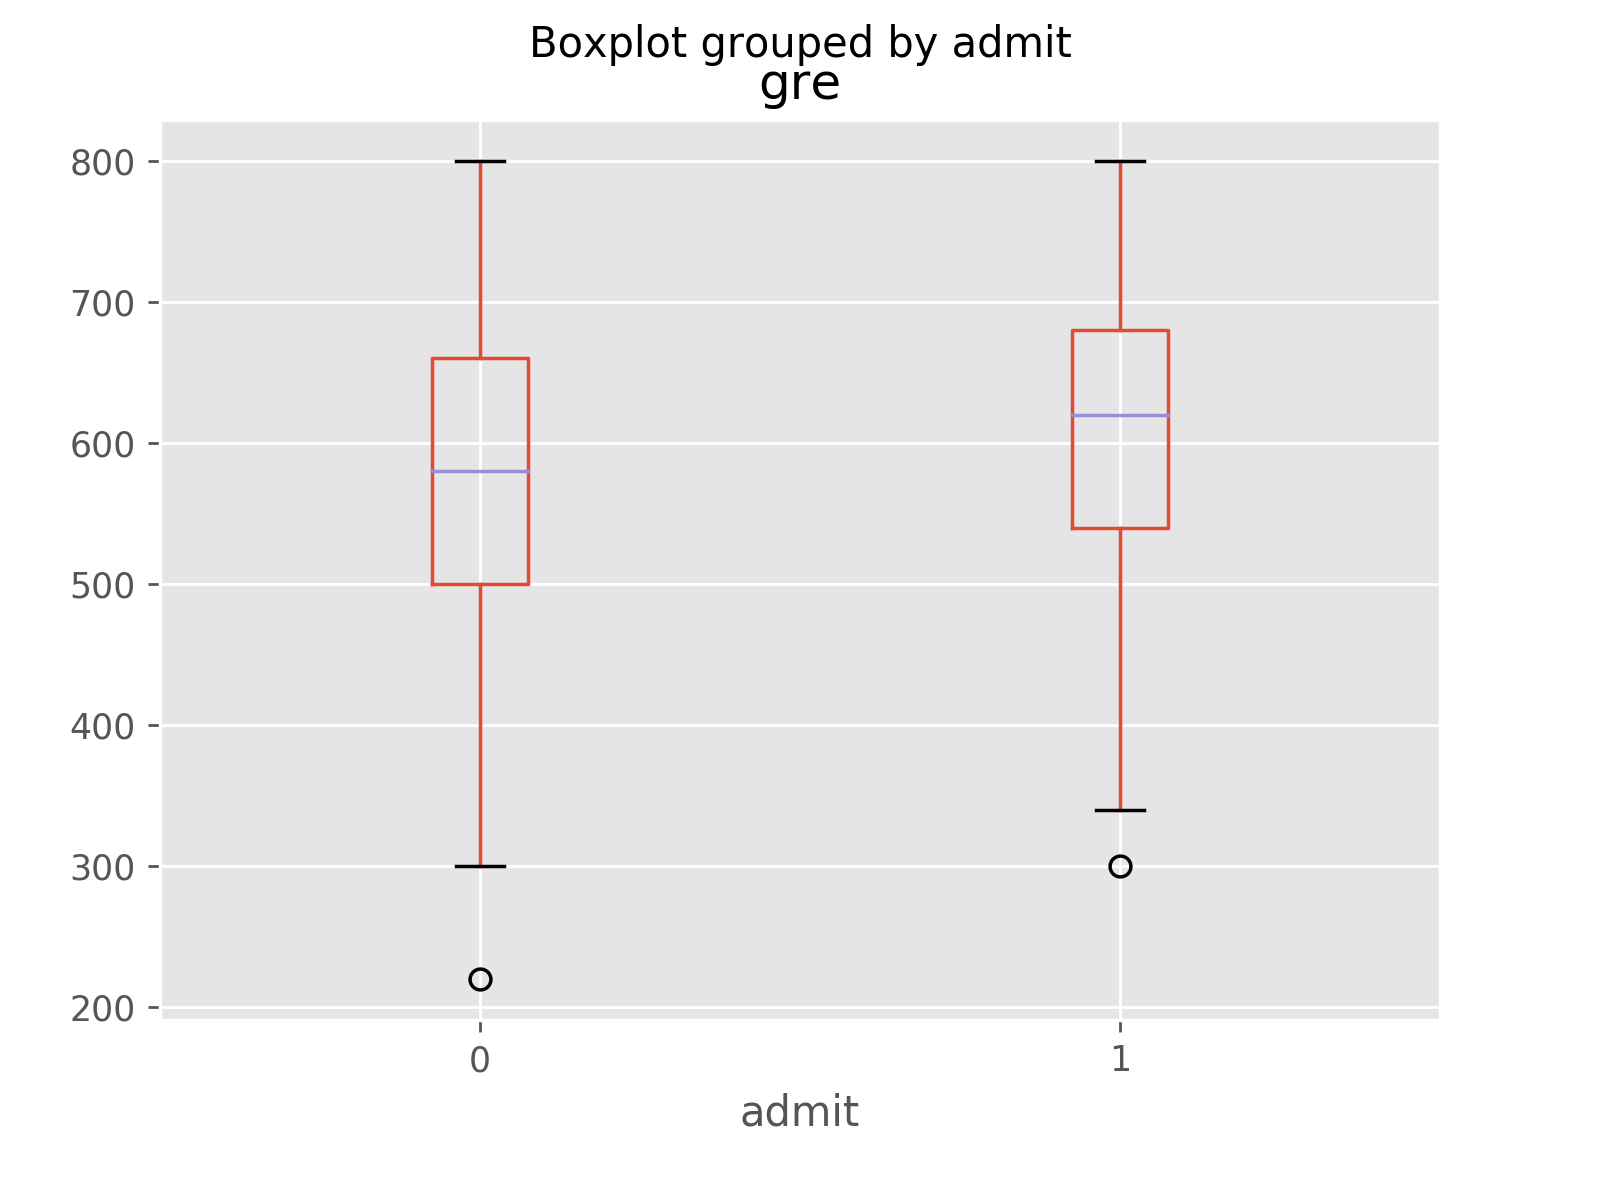

In [50]:
print str(round(df.gre.mean(),0)) + " is the mean and " + str(round(df.gre.median(),0)) + " is the median"

import matplotlib
matplotlib.style.use('ggplot')
df.boxplot(column="gre",by="admit")

> ### Question 16.  What is colinearity?

Answer: Colinearity is a phenomenon as per which two are more variables are correlated with each other. This means, that one of the variables can be predicted using the other.

> ### Question 17.  How will you test for covariance?

Covariance is a measure of correlation. Correlation does not have a dimension, but covariance does. The two statements below give covariance and correlation respectively.

In [57]:
df.cov() # returns the covariance between variables
df.corr() # returns the correlation between variables


,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

<IPython.core.display.Javascript object>


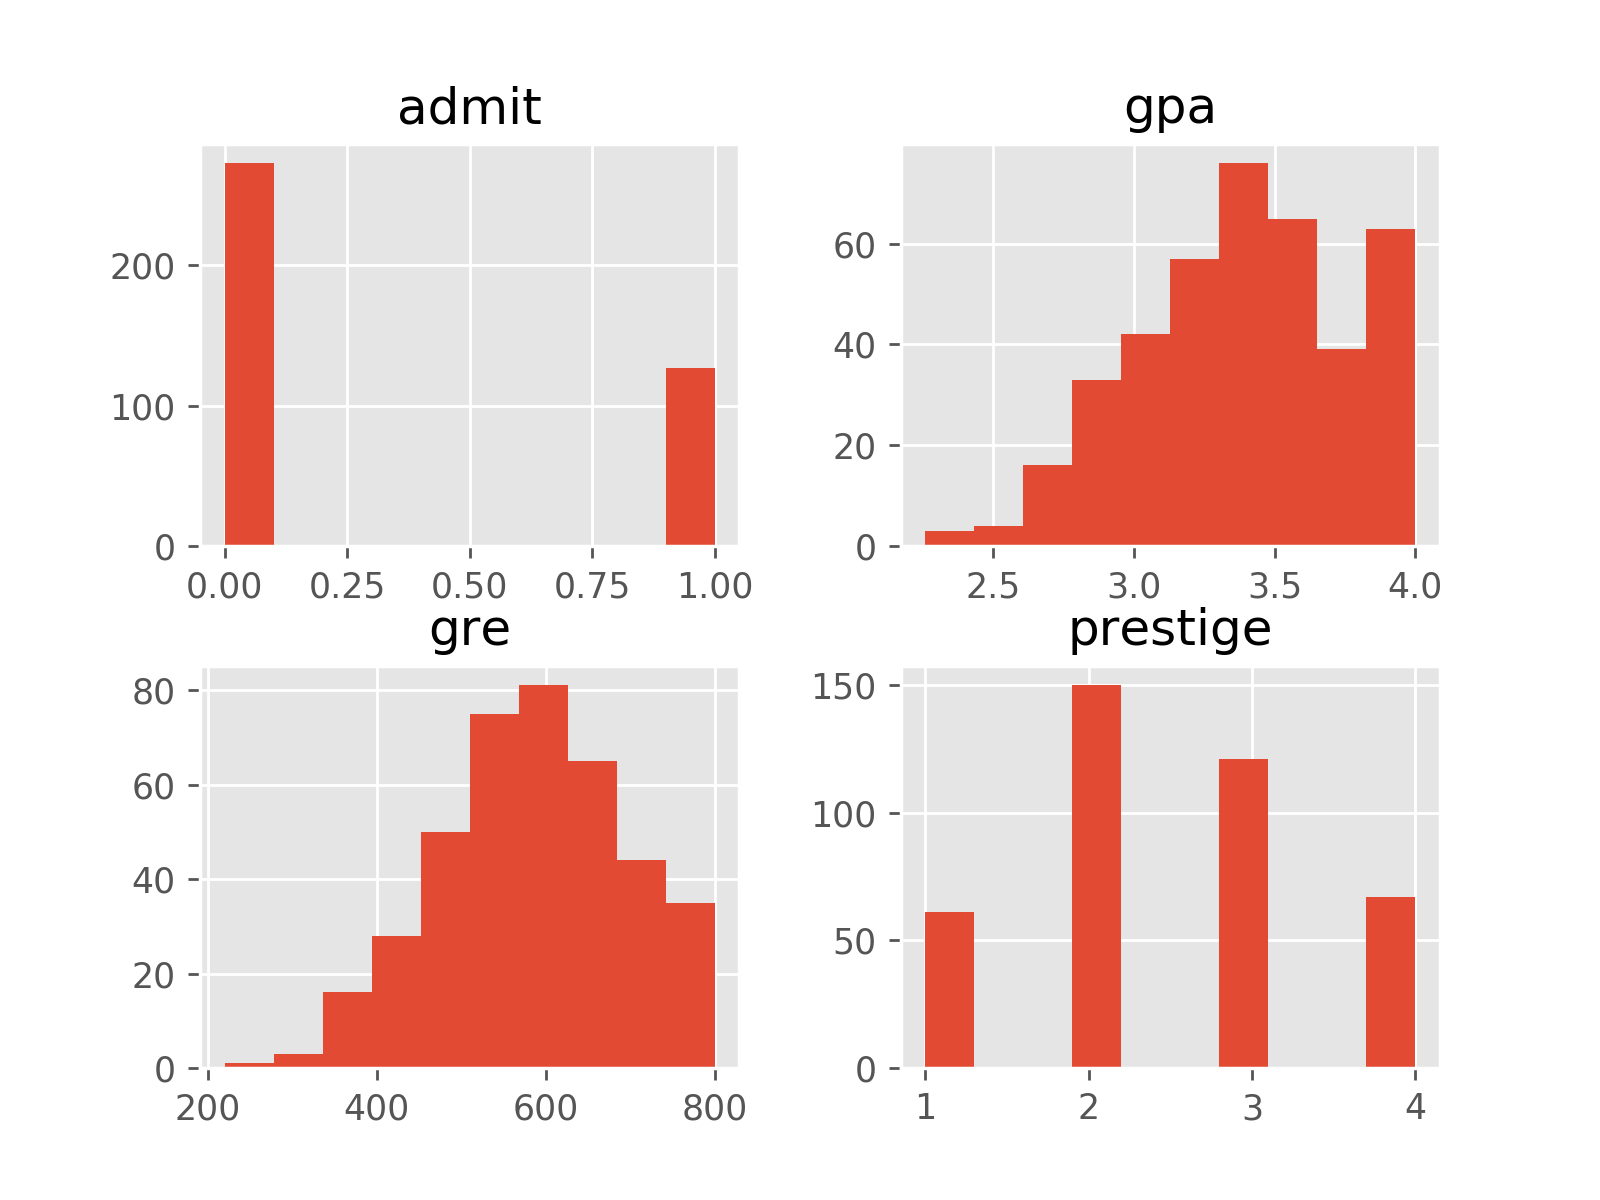

<IPython.core.display.Javascript object>


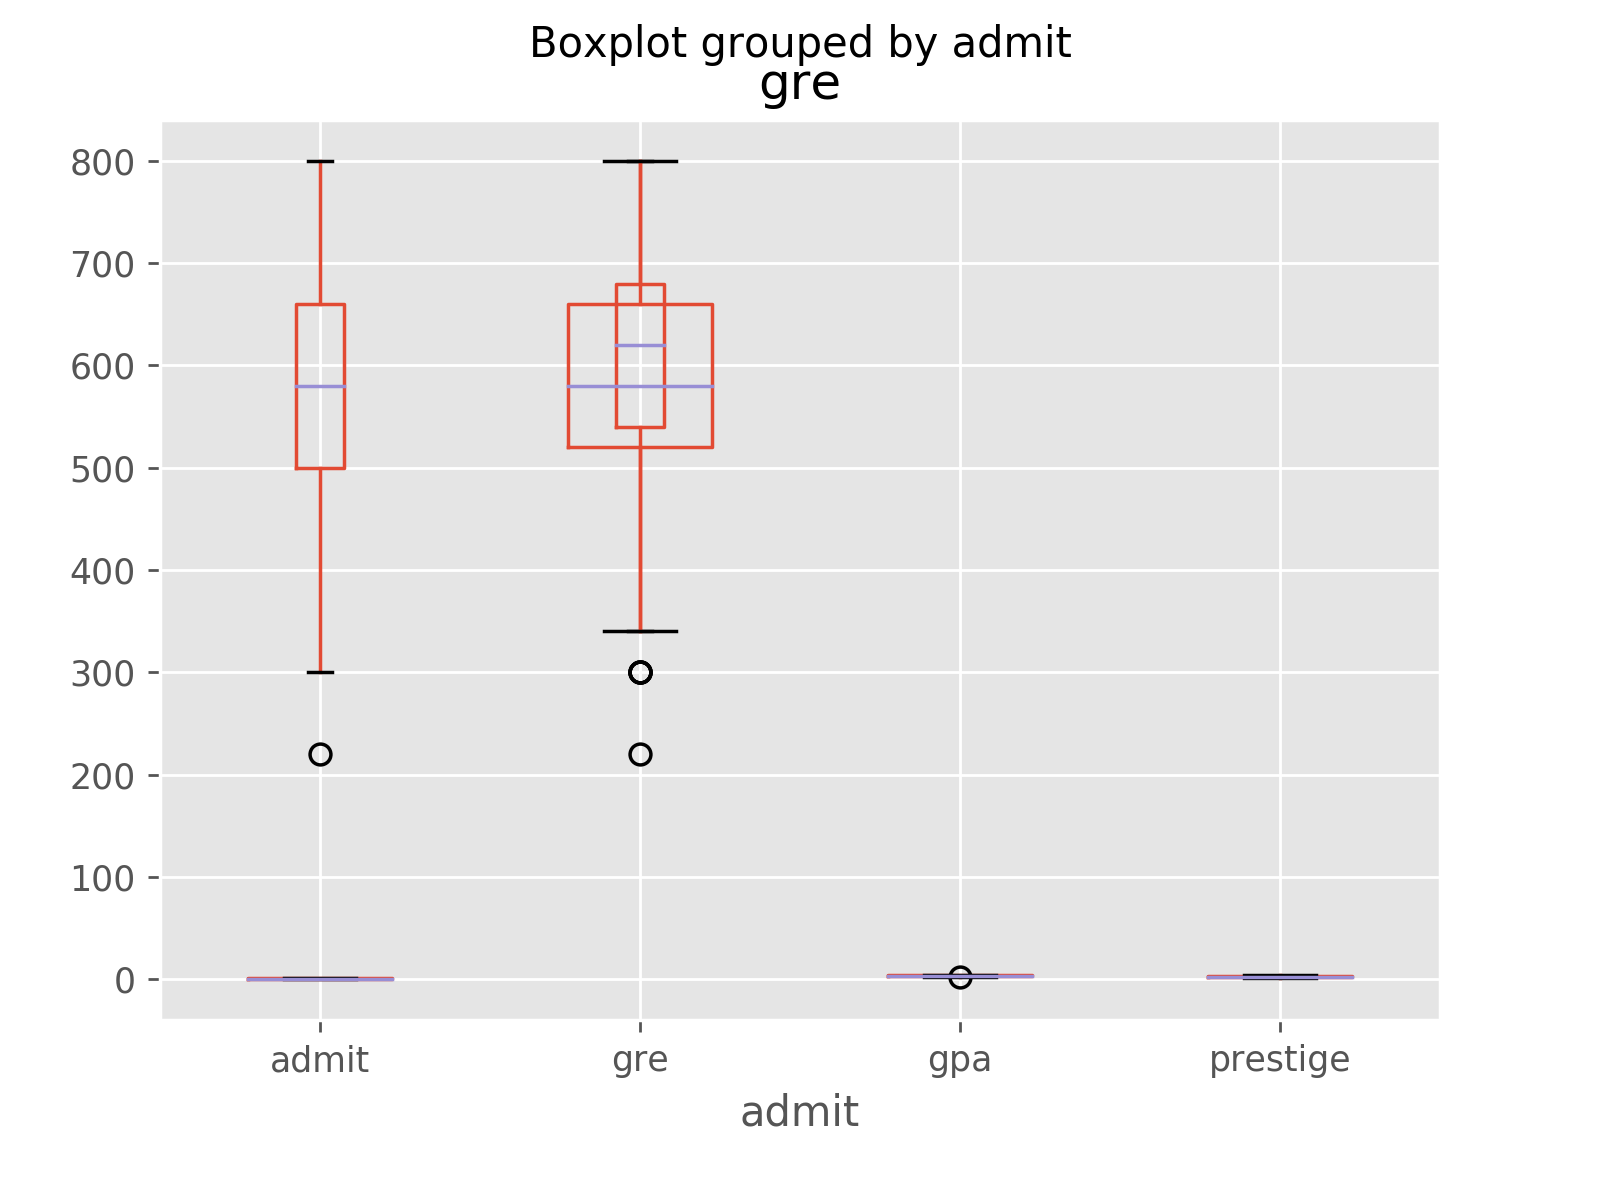

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [71]:
#Step 1- This is to determine what does the data look like, to get a feel of the data
df

#Step 2- What is the distribution of data
df.hist()

#Step 3- What are the values/limits of the dataset
df.describe()

#Step 4- What are the non missing value counts in the dataset
df.count()

#Step 5- What are the missing value counts in the dataset
df.isnull().sum()

#Step 6- What is the distribution of the dataset, how many outliers are in the dataset
#Step 6- What is the extent of these outliers
import matplotlib
matplotlib.style.use('ggplot')
df.boxplot(column="gre",by="admit")
df.boxplot()

#Step 7- What is the median of the values in the dataset
df.median()

#How are the variables correlated amongst themselves?
df.corr()


Answer: TODO